# TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
df = pd.read_csv("C:/Users/PK/Desktop/datasets/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
print(df.isnull().sum()/len(df)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [31]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(['Cabin','PassengerId','Name','Ticket','Fare'],axis = 1, inplace = True)

In [33]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

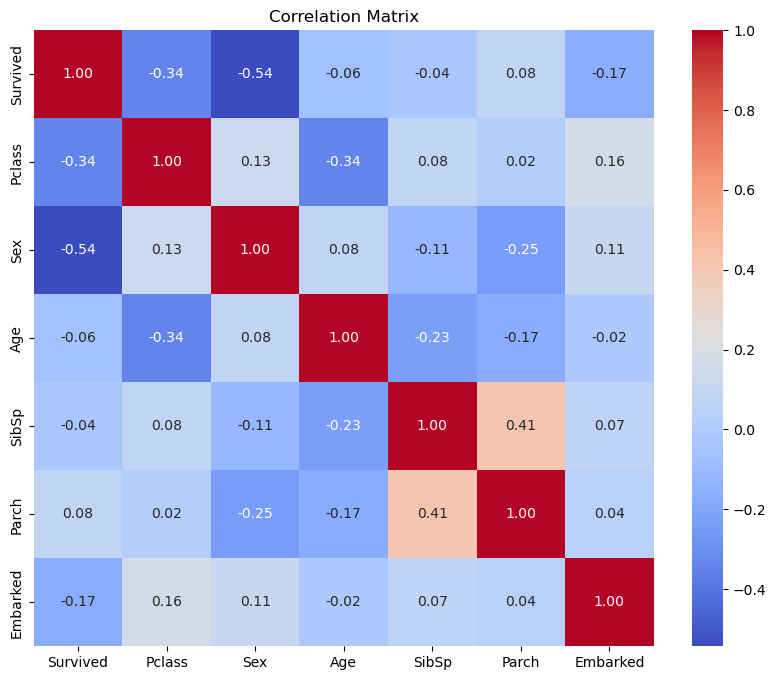

In [35]:
plt.figure(figsize = (10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [37]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.81

Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [43]:
def predict_survival():
    print("\n--- Enter Passenger Details for Prediction ---")
    pclass = int(input("Enter Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): "))
    sex = input("Enter Sex (male/female): ").lower()
    age = float(input("Enter Age: "))
    sibsp = int(input("Enter Number of Siblings/Spouses Aboard: "))
    parch = int(input("Enter Number of Parents/Children Aboard: "))
    embarked = input("Enter Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton): ").upper()

    sex_encoded = 1 if sex == 'male' else 0
    embarked_C_Q = 1 if embarked == 'C' or 'Q' else 0

    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex_encoded],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Embarked': [embarked_C_Q]
    })

    prediction = logreg.predict(input_data)
    survival = "Survived" if prediction[0] == 1 else "Did Not Survive"
    print(f"\nPrediction: The passenger would have {survival}.")
predict_survival()


--- Enter Passenger Details for Prediction ---


Enter Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd):  3
Enter Sex (male/female):  female
Enter Age:  15
Enter Number of Siblings/Spouses Aboard:  0
Enter Number of Parents/Children Aboard:  0
Enter Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):  Q



Prediction: The passenger would have Survived.
